# d18O

In [6]:
# read the Cheng H et al-2016 age uncertainty.xlsx under D:\VScode\bipolar_seesaw_CCM\other_data
import pandas as pd

df_d18O_age = pd.read_excel(
    r'D:\VScode\bipolar_seesaw_CCM\other_data\Cheng H et al-2016 age uncertainty.xlsx',
    sheet_name='Sheet1',
    header=0)

# sort the data by 'age' column
df_d18O_age = df_d18O_age.sort_values(by='age')

df_d18O_age.info

<bound method DataFrame.info of             age uncertainty
0    217.480000       0.444
1    218.003534    0.984773
2    219.086000        0.97
3    221.553587    1.128904
4    222.907879        1.08
..          ...         ...
183  624.500000        ±6.7
178  625.600000        ±9.9
182  630.300000        ±6.8
185  638.200000        ±7.4
184  640.300000        ±8.1

[204 rows x 2 columns]>

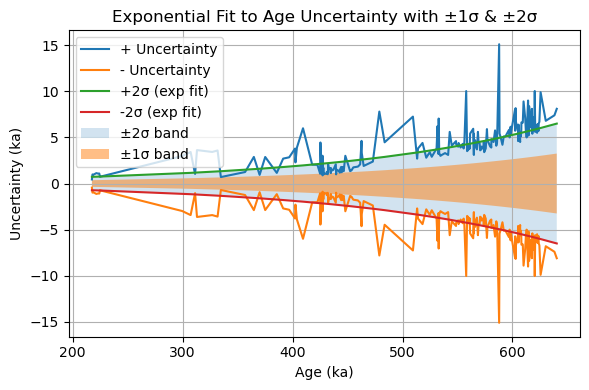

In [13]:
import numpy as np
import matplotlib.pyplot as plt

df = df_d18O_age

df['uncertainty'] = df['uncertainty'].astype(str).str.replace('±', '', regex=False).astype(float)

# 1) Fit exponential: uncertainty ≈ a0 * exp(b * age)
x = df['age'].values
y = df['uncertainty'].values

# do a linear fit on log(y)
b, log_a0 = np.polyfit(x, np.log(y), 1)
a0 = np.exp(log_a0)

# compute the fitted 2σ curve
df['unc_fit2σ'] = a0 * np.exp(b * x)

# define σ = fitted_2σ / 2
df['sigma']    = df['unc_fit2σ'] / 2.0
df['upper2σ']  =  df['unc_fit2σ']
df['lower2σ']  = -df['unc_fit2σ']
df['upper1σ']  =  df['sigma']
df['lower1σ']  = -df['sigma']

# 2) Plot
plt.figure(figsize=(6,4))
plt.plot(df['age'], df['uncertainty'], label='+ Uncertainty')
plt.plot(df['age'], -df['uncertainty'], label='- Uncertainty')
plt.plot(df['age'], df['upper2σ'], lw=1.5, label='+2σ (exp fit)')
plt.plot(df['age'], df['lower2σ'], lw=1.5, label='-2σ (exp fit)')


plt.fill_between(df['age'], df['lower2σ'], df['upper2σ'],
                 alpha=0.2, label='±2σ band')
plt.fill_between(df['age'], df['lower1σ'], df['upper1σ'],
                 alpha=0.5, label='±1σ band')

plt.xlabel('Age (ka)')
plt.ylabel('Uncertainty (ka)')
plt.title('Exponential Fit to Age Uncertainty with ±1σ & ±2σ')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


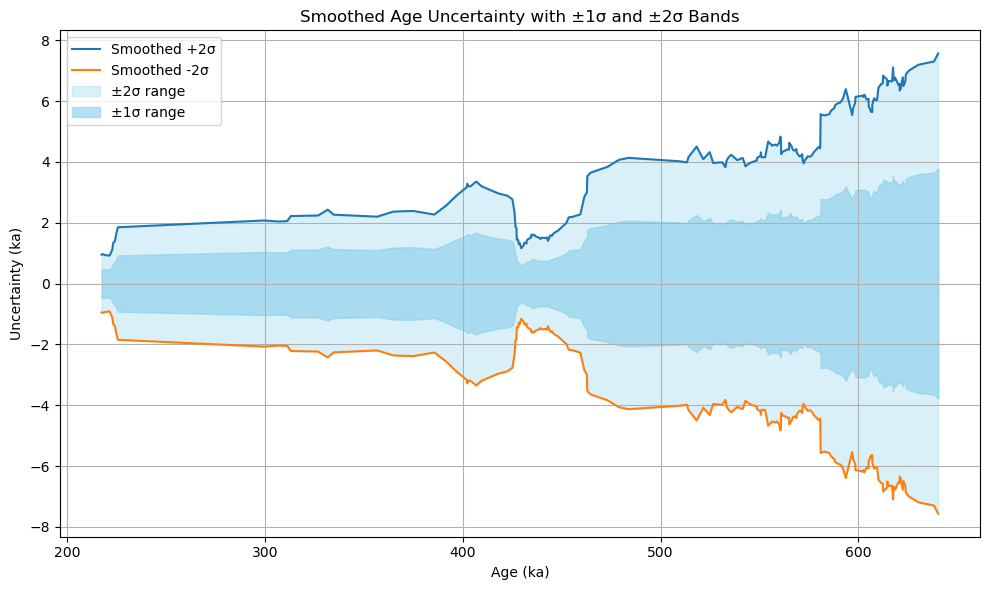

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = df_d18O_age

df['uncertainty'] = df['uncertainty'].astype(str).str.replace('±', '', regex=False).astype(float)

# Smooth the uncertainty curve using a rolling mean
window = 11 if len(df) >= 11 else len(df)
df['unc_smooth'] = df['uncertainty'].rolling(window=window, center=True, min_periods=1).mean()

# Define ±1σ and ±2σ bands
df['upper_2sigma'] = df['unc_smooth']
df['lower_2sigma'] = -df['unc_smooth']
df['upper_1sigma'] = df['unc_smooth'] / 2.0
df['lower_1sigma'] = -df['unc_smooth'] / 2.0

# Plot
plt.figure(figsize=(10, 6))
# Smoothed ±2σ line
plt.plot(df['age'], df['unc_smooth'], label='Smoothed +2σ', lw=1.5)
plt.plot(df['age'], df['lower_2sigma'], label='Smoothed -2σ', lw=1.5)

# Fill ±2σ band
plt.fill_between(df['age'], df['lower_2sigma'], df['upper_2sigma'],
                 color='skyblue', alpha=0.3, label='±2σ range')

# Fill ±1σ band
plt.fill_between(df['age'], df['lower_1sigma'], df['upper_1sigma'],
                 color='skyblue', alpha=0.6, label='±1σ range')

# Labels and styling
plt.xlabel('Age (ka)')
plt.ylabel('Uncertainty (ka)')
plt.title('Smoothed Age Uncertainty with ±1σ and ±2σ Bands')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


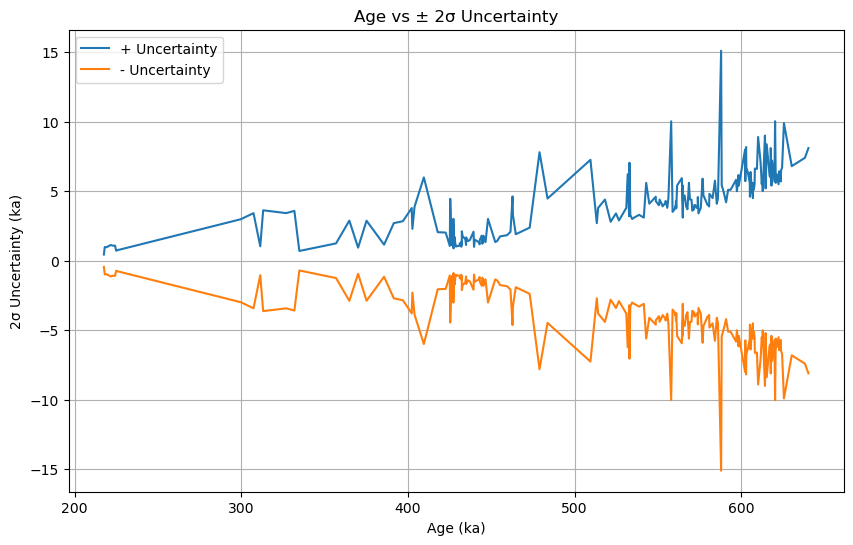

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df = df_d18O_age


df['uncertainty'] = df['uncertainty'].astype(str).str.replace('±', '', regex=False).astype(float)

# Plot age vs uncertainty and age vs -uncertainty as lines
plt.figure(figsize=(10, 6))
plt.plot(df['age'], df['uncertainty'], label='+ Uncertainty')
plt.plot(df['age'], -df['uncertainty'], label='- Uncertainty')
plt.xlabel('Age (ka)')
plt.ylabel('2σ Uncertainty (ka)')
plt.title('Age vs ± 2σ Uncertainty')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
file_path = r"D:\VScode\bipolar_seesaw_CCM\other_data\monsoon.xlsx"
df_d18O = pd.read_excel(file_path)
df_d18O['age'] *= 1000  # to yrs BP
df_d18O['d18O'] = df_d18O['d18O'].values*-1
# renmae column d18O to 'd18O*-1'
df_d18O.rename(columns={'d18O': '-d18O'}, inplace=True)